In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "low_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  
%run -i /home/cz136/project/sa/lib/src/corr_func.py  

In [4]:
# z_diff=float(z_diff)

In [5]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
    
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

In [6]:
if vol!="uber":
    members=shapes

In [7]:
if quantile!="":
    i=int(quantile)

In [8]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [9]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [10]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [11]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [12]:
NBINS=10

In [13]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [14]:
len(shapes)

15405

In [15]:
len(members)

15405

In [16]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [17]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

20it [00:00, 195.42it/s]

41it [00:00, 197.96it/s]

61it [00:00, 196.01it/s]

83it [00:00, 200.47it/s]

105it [00:00, 203.96it/s]

127it [00:00, 206.45it/s]

149it [00:00, 208.47it/s]

171it [00:00, 210.52it/s]

193it [00:00, 211.96it/s]

215it [00:01, 213.11it/s]

237it [00:01, 213.49it/s]

259it [00:01, 213.81it/s]

281it [00:01, 214.97it/s]

303it [00:01, 203.14it/s]

325it [00:01, 207.29it/s]

347it [00:01, 208.88it/s]

368it [00:01, 205.76it/s]

390it [00:01, 208.12it/s]

412it [00:01, 210.32it/s]

434it [00:02, 211.92it/s]

456it [00:02, 212.18it/s]

478it [00:02, 213.00it/s]

500it [00:02, 213.34it/s]

522it [00:02, 214.50it/s]

544it [00:02, 213.91it/s]

553it [00:02, 210.22it/s]


0it [00:00, ?it/s]

20it [00:00, 197.53it/s]

Number of empty sat catalogs is 0


43it [00:00, 205.37it/s]

65it [00:00, 209.13it/s]

88it [00:00, 214.68it/s]

111it [00:00, 218.17it/s]

134it [00:00, 220.82it/s]

157it [00:00, 222.71it/s]

178it [00:00, 198.50it/s]

200it [00:00, 204.27it/s]

224it [00:01, 211.85it/s]

248it [00:01, 218.76it/s]

272it [00:01, 223.80it/s]

296it [00:01, 221.42it/s]

319it [00:01, 213.84it/s]

341it [00:01, 207.41it/s]

362it [00:01, 195.60it/s]

382it [00:01, 196.40it/s]

402it [00:01, 197.11it/s]

422it [00:02, 197.21it/s]

442it [00:02, 197.26it/s]

465it [00:02, 204.28it/s]

489it [00:02, 212.84it/s]

511it [00:02, 209.45it/s]

533it [00:02, 207.19it/s]

553it [00:02, 210.62it/s]

Number of empty sat catalogs is 0


In [18]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [19]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

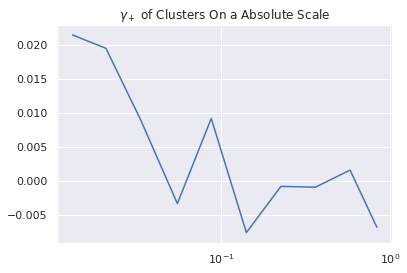

Aggregated xi:
[-1.734  -3.48   -2.5129  1.7078 -8.38   11.8149  2.0836  3.2147 -5.7346
 12.9768]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -350.8621  -693.9125  -968.7822 -1460.5076 -2241.7696 -3026.8701
 -3597.3005 -3351.124  -2062.8542  -348.6077]
------------------------------------------------------------------------------
Aggregated npairs:
[  81.  179.  285.  503.  918. 1542. 2409. 3276. 3746. 1885.]
------------------------------------------------------------------------------
Mean xi:
[-0.0214 -0.0194 -0.0088  0.0034 -0.0091  0.0077  0.0009  0.001  -0.0015
  0.0069]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3316 -3.8766 -3.3992 -2.9036 -2.442  -1.963  -1.4933 -1.0229 -0.5507
 -0.1849]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

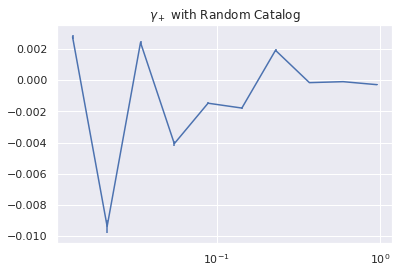

[ 2.7867e-03 -9.3750e-03  2.4187e-03 -4.0667e-03 -1.4733e-03 -1.7840e-03
  1.9193e-03 -1.5397e-04 -9.1733e-05 -2.8472e-04]
[-1.1850e-04  3.9866e-04 -1.0285e-04  1.7294e-04  6.2652e-05  7.5862e-05
 -8.1615e-05  6.5473e-06  3.9009e-06  1.2108e-05]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

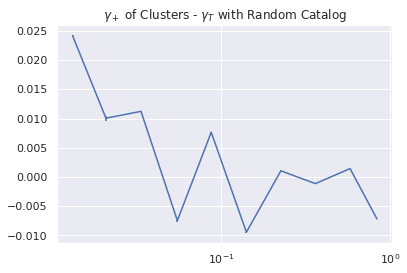

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

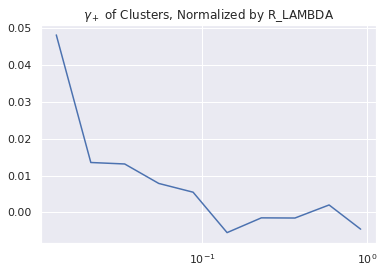

Aggregated xi:
[-2.0248 -1.8287 -3.0624 -2.8434 -3.9701  6.9485  3.0036  4.5984 -7.3568
 15.6873]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -182.4336  -521.2252  -789.2604 -1053.8904 -1762.7262 -2466.5486
 -2960.123  -2999.0859 -1944.4034  -303.7269]
------------------------------------------------------------------------------
Aggregated npairs:
[  42.  135.  233.  362.  725. 1261. 2004. 2978. 3670. 3427.]
------------------------------------------------------------------------------
Mean xi:
[-0.0482 -0.0135 -0.0131 -0.0079 -0.0055  0.0055  0.0015  0.0015 -0.002
  0.0046]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3437 -3.8609 -3.3874 -2.9113 -2.4313 -1.956  -1.4771 -1.0071 -0.5298
 -0.0886]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)